# How-to convert a `timml` model to `timflow`
Conversion of a `timml` model to a `timflow` model only requires a few minor changes. 

## The `import` statement
The `timflow.steady` model is essentially the same as `timml`. 
So all that is required is to change the import statement. 
For example, if your model imports `timml` as

```import timml```

and you don't want to make any other changes to your model, then replace the import statement by

```from timflow import steady as timml```

or, if you like that better

```import timflow.steady as timml```

If you used a different name in your original model, then make sure to use the same name in the `timflow` model. So if your import statement was

```import timml as tml```

then replace it by

```import timflow.steady as tml```

Note: The docs of `timflow` use the three-letter abbreviation `tfs` (for **t**im**f**low **s**teady) for the steady model.

## Combining two or more plot statements on the same graph

All plotting commands in `timflow` are gathered in the `plots` submodule. Each plotting command optionally takes an axis as input. If now axis is provided, then a new plot is created. Each plotting command returns the axis to which is plots. When you issue multiple plotting commands in a row, for example to first plot contours and then on the same graph plot tracelines, then make sure that the axis created by the contouring command is passed to the tracelines command. For example, consider the following model of a well in uniform flow

In [1]:
import timflow.steady as tfs

In [2]:
ml = tfs.ModelMaq(kaq=10, z=[10, 0])
rf = tfs.Constant(ml, xr=-1000, yr=0, hr=41)
uf = tfs.Uflow(ml, slope=0.001, angle=0)
w = tfs.Well(ml, xw=-400, yw=0, Qw=50.0, rw=0.2)
ml.solve()

Number of elements, Number of equations: 3 , 1
..
solution complete


A contour plot is created and the returned axis is stored in the variable `ax0`. Then a traceline is computed and added to the same graph by supplying the `ax=ax0` as input. 

.


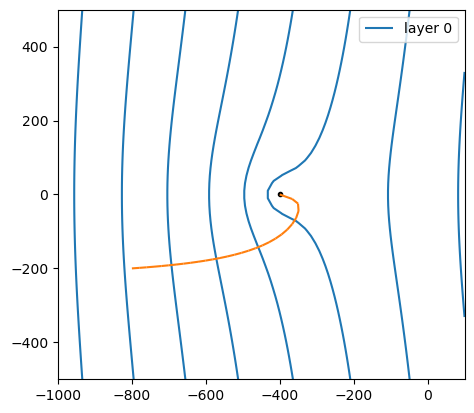

In [3]:
ax0 = ml.plots.contour(win=[-1000, 100, -500, 500], ngr=50, levels=10, labels=False)
ml.plots.tracelines(
    xstart=[-800], ystart=[-200], zstart=[1], hstepmax=20, color="C1", ax=ax0
)

Note that two separate graphs are created when the `ax=ax0` input is omitted. You won't even see much on the second graph, as no window is provided (like the `win=[-1000, 100, -500, 500]` specification for the contours). The window is set by default to a very large area if no `ax` is provided and no `win`. 

The same procedure holds for combining other plots. For example combining two contour plots, or a contour plot plus a capture zone. Note that the `plotcapzone` function has moved to the `plots` module. All three can be combined as follows

..........


<Axes: >

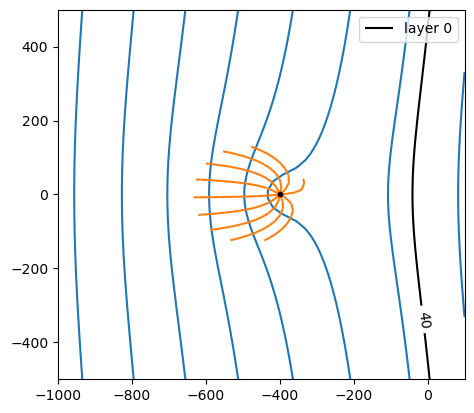

In [4]:
ax0 = ml.plots.contour(win=[-1000, 100, -500, 500], ngr=50, levels=10, labels=False)
ml.plots.plotcapzone(
    well=w, nt=10, zstart=[1], hstepmax=20, tmax=10 * 365, color="C1", ax=ax0
)
ml.plots.contour(win=[-1000, 100, -500, 500], ngr=50, levels=[40], color="k", ax=ax0)

### Renaming of line-sink elements

If you had not updated your `timml` model recently, you may not have noticed that some old element names have been replaced by newer more descriptive ones. This was done in version 6.8.0. The old ones still work, but you will get a deprecation warning. These are the changes:
* `HeadLineSink` -> `River`
* `HeadLineSinkString` -> `RiverString`
* `LineSinkDitch` -> `Ditch`
* `LineSinkDitchString` -> `DitchString`

### New elements
In `timml` release 6.8.0 and before, a bunch of new elements were introduced that may be worth checking out:
* `WellString`: A string of wells for which the total discharge is given. The discharge is distributed over the wells such that the head inside the wells is the same for all wells. This element is intended for wells connected by a manifold and a single pump. 
* `TargetHeadWell`: A well for which a target head is specified at a target location. The discharge is computed to meet the specified head at the target location.
* `TargetHeadWellString`: Like a string of wells, but now the total dicharge is computed such that the specified head is met at the the target location.
* `RadialCollectorWell`: A radial collector well with an arbitrary number of arms. The total discharge of the radial collector well is specified and is distributed across the arms such that the head is uniform and equal along all arms. 
* `BuildingPitMaq`: A special inhomogeneity element to simulate sheet piles around a building pit. For use in a `ModelMaq` model. 
* `BuildingPit3D`: A special inhomogeneity element to simulate sheet piles around a building pit. For use in a `Model3D` model. 